# 1.) Bar charts

In [28]:
import os
import csv
import statistics
import math
import matplotlib.pyplot as plt
import numpy as np

In [29]:
def compute_stats(data):
    mean = statistics.mean(data)
    std_dev = statistics.stdev(data)
    std_error = std_dev / math.sqrt(len(data))
    ci_95 = 1.96 * std_error
    return mean, ci_95

def load_data(files, CSV_DIR = './DATA/CSV/'):
    labels = []
    enc_means = []
    enc_cis = []
    dec_means = []
    dec_cis = []

    for filename in files:
        path = os.path.join(CSV_DIR, filename)
        with open(path, 'r') as f:
            reader = csv.DictReader(f)
            enc_times = []
            dec_times = []
            for row in reader:
                enc_times.append(float(row['Encryption Time']))
                dec_times.append(float(row['Decryption Time']))

        mean_enc, ci_enc = compute_stats(enc_times)
        mean_dec, ci_dec = compute_stats(dec_times)

        label = filename.replace('.csv', '').replace('-0', '')
        labels.append(label)
        enc_means.append(mean_enc)
        enc_cis.append(ci_enc)
        dec_means.append(mean_dec)
        dec_cis.append(ci_dec)

    return labels, enc_means, enc_cis, dec_means, dec_cis

In [35]:
def plot_bar_chart(TARGET_FILES, filename=None, FIG_X=12, FIG_Y=6):
    labels, means_enc, ci_enc, means_dec, ci_dec = load_data(TARGET_FILES)
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(FIG_X, FIG_Y))

    bars_enc = ax.bar(x - width/2, means_enc, width, yerr=ci_enc,
                      label='Encryption', color='skyblue', capsize=5)
    bars_dec = ax.bar(x + width/2, means_dec, width, yerr=ci_dec,
                      label='Decryption', color='lightcoral', capsize=5)

    # Add labels above or inside bars
    def add_labels(bars, means, cis):
        for bar, mean, ci in zip(bars, means, cis):
            label = f"{mean:.0f} ± {ci:.1f}"
            height = bar.get_height()
            if height > 500:
                ax.text(
                    bar.get_x() + bar.get_width()/2.0, height - 50,
                    label, ha='center', va='top', fontsize=12, rotation=90
                )
            else:
                ax.text(
                    bar.get_x() + bar.get_width()/2.0, height + 50,
                    label, ha='center', va='bottom', fontsize=12, rotation=90
                )

    add_labels(bars_enc, means_enc, ci_enc)
    add_labels(bars_dec, means_dec, ci_dec)

    ax.set_ylabel('Time (µs)', fontsize=14)
    # ax.set_title('Encryption and Decryption Time (256 Byte Payload, No Associated Data)')
    ax.set_title('Encryption and Decryption Time for Algorithms Used in IoT Devices', fontsize=14)
    ax.set_xlabel('Encryption Algorithm',fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right',fontsize=14)
    ax.legend(fontsize=14)
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5)
    fig.tight_layout()
    if filename != None:
        plt.savefig(filename)
    plt.show()

## 1.1) All Algos

figs/enc_dec_bar_all.png


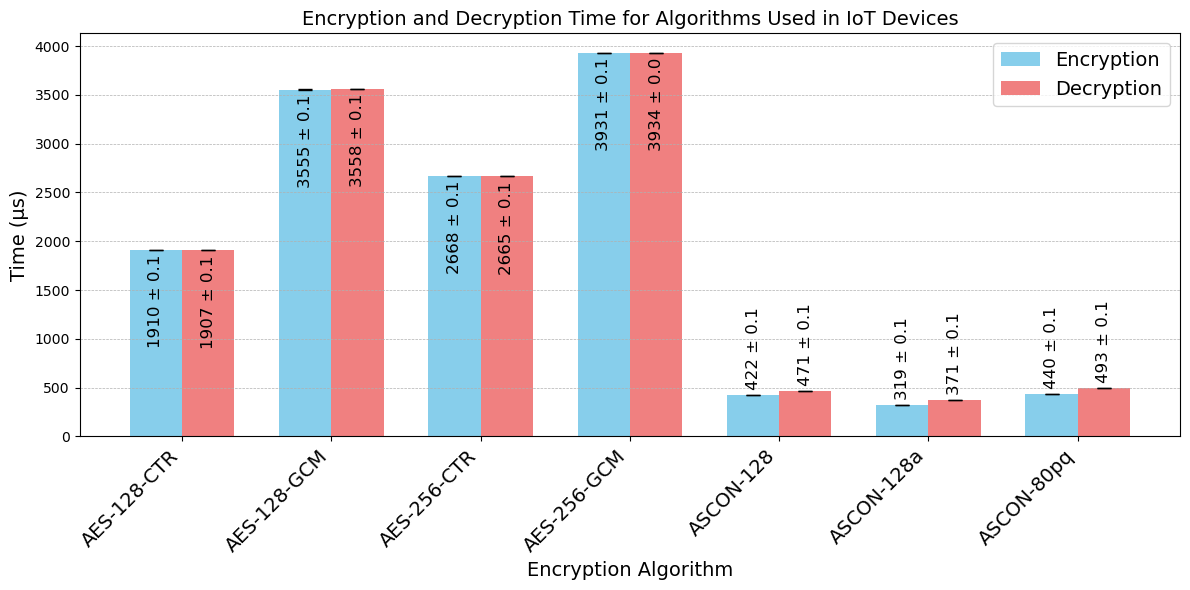

In [34]:
TARGET_FILES = [
    'AES-128-CTR.csv',
    'AES-128-GCM-0.csv',
    'AES-256-CTR.csv',
    'AES-256-GCM-0.csv',
    'ASCON-128-0.csv',
    'ASCON-128a-0.csv',
    'ASCON-80pq-0.csv',
]

plot_bar_chart(TARGET_FILES, filename='figs/enc_dec_bar_all.png')

## 1.2) IoT Bar Chart

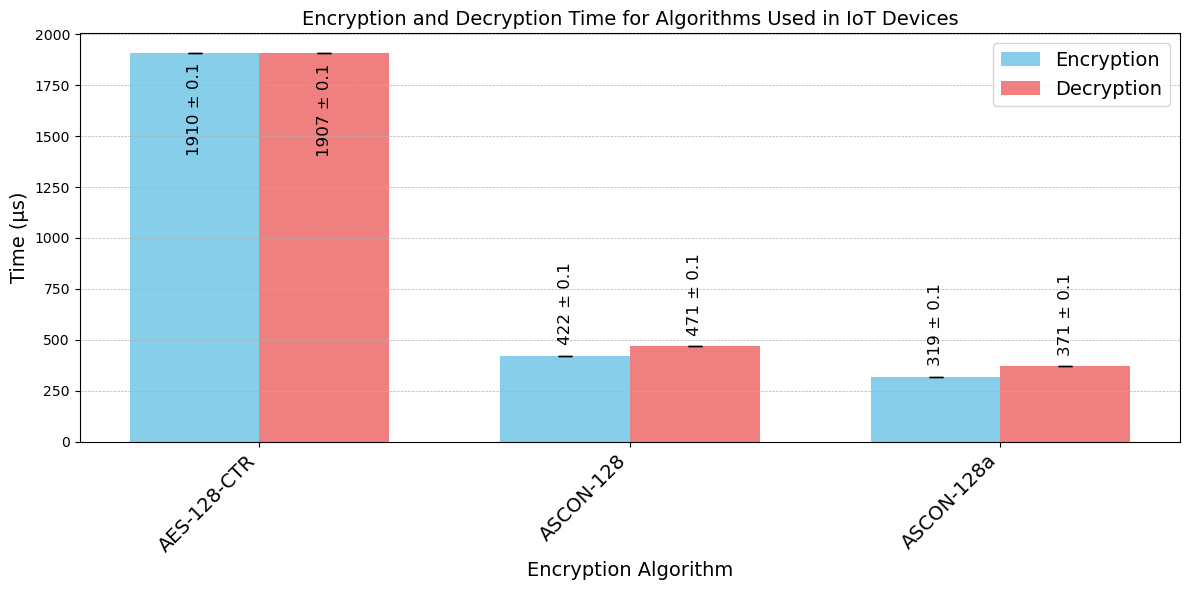

In [36]:
TARGET_FILES = [
    'AES-128-CTR.csv',
    # 'AES-128-GCM-0.csv',
    # 'AES-256-CTR.csv',
    # 'AES-256-GCM-0.csv',
    'ASCON-128-0.csv',
    'ASCON-128a-0.csv',
    # 'ASCON-80pq-0.csv', 
]

plot_bar_chart(TARGET_FILES, filename='figs/enc_dec_bar_iot.png')

## 1.3) Quant Algo

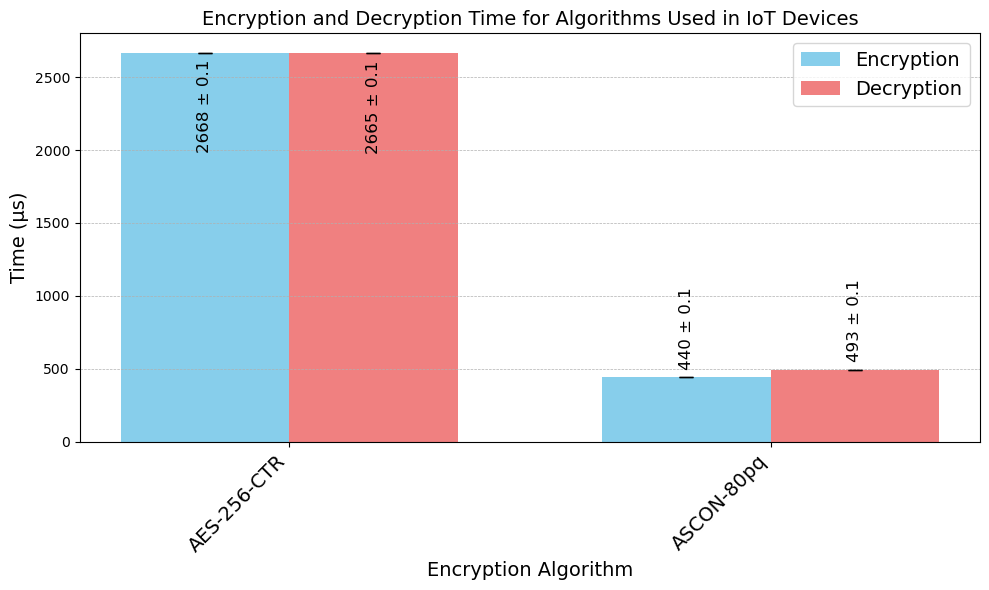

In [37]:
TARGET_FILES = [
    # 'AES-128-CTR.csv',
    # 'AES-128-GCM-0.csv',
    'AES-256-CTR.csv',
    # 'AES-256-GCM-0.csv',
    # 'ASCON-128-0.csv',
    # 'ASCON-128a-0.csv',
    'ASCON-80pq-0.csv', 
]

plot_bar_chart(TARGET_FILES, filename='figs/enc_dec_bar_quant.png', FIG_X=10)

# Line Charts

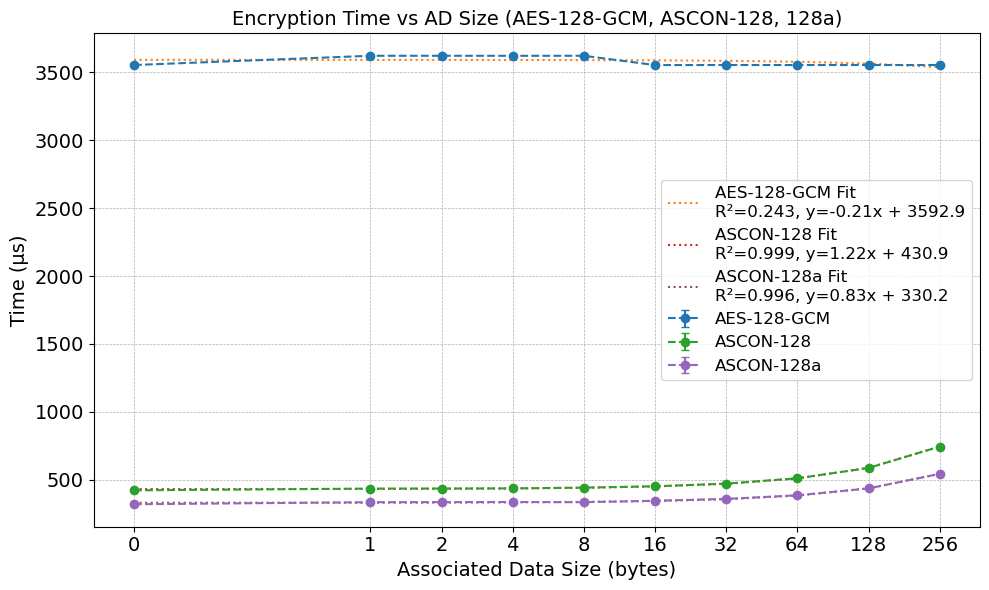

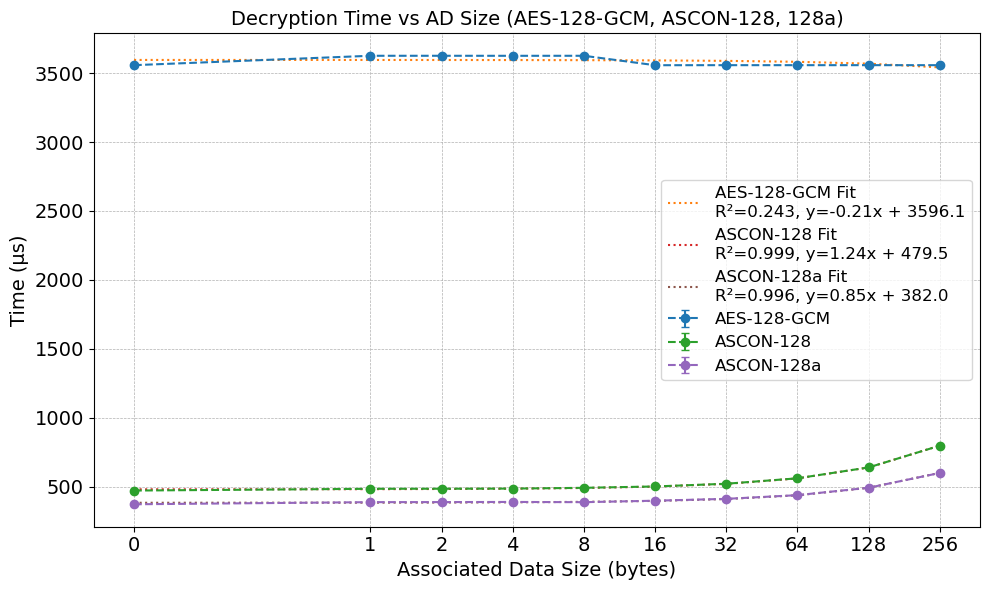

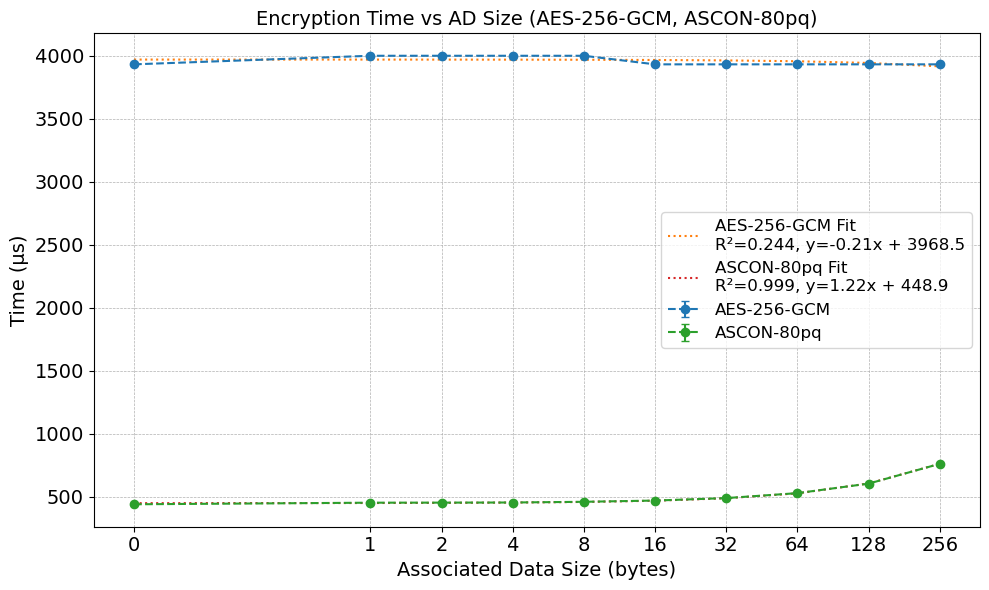

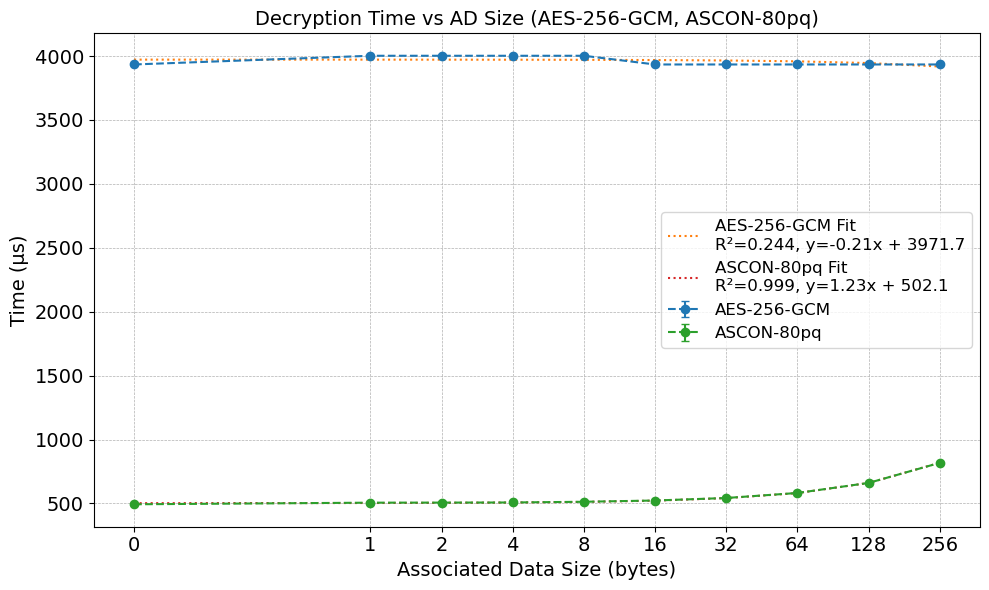

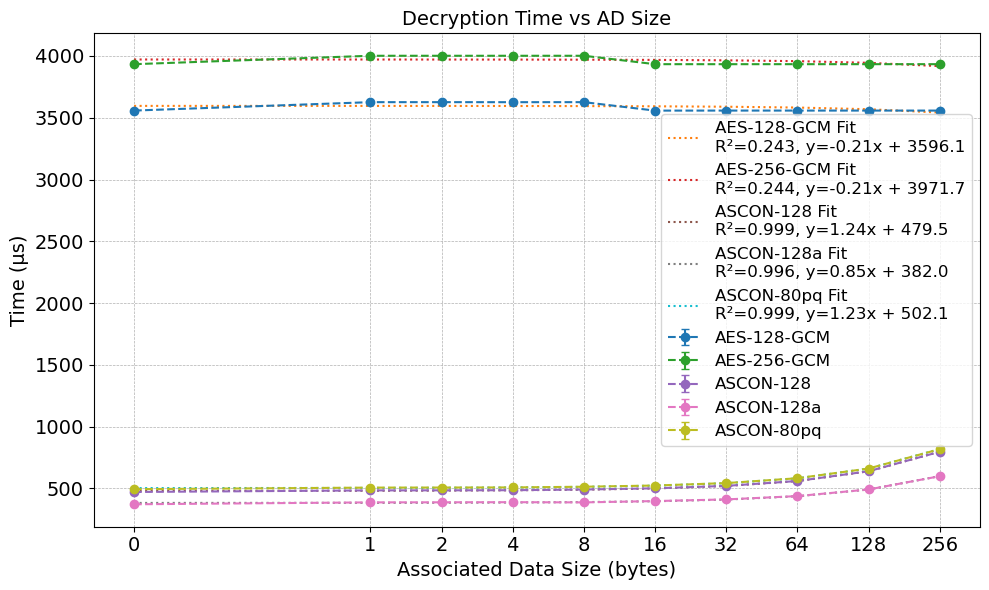

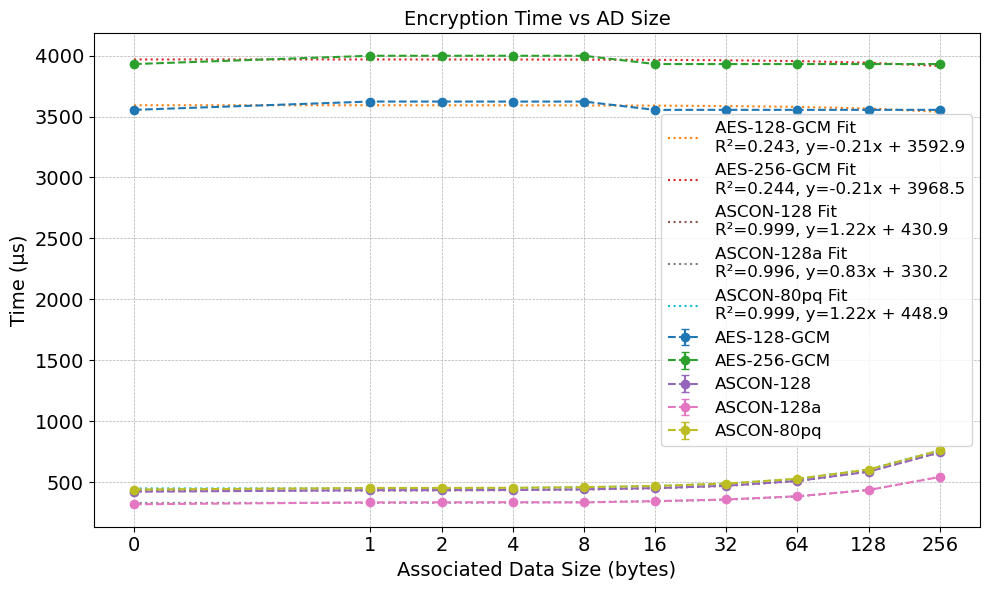

In [3]:
import os
import csv
import statistics
import math
import matplotlib.pyplot as plt
import numpy as np

CSV_DIR = './DATA/CSV/'

def compute_stats(data):
    stats = {}
    stats['Mean'] = statistics.mean(data)
    stats['Std Dev'] = statistics.stdev(data)
    stats['Std Error'] = stats['Std Dev'] / math.sqrt(len(data))
    stats['95% CI'] = 1.96 * stats['Std Error']
    return stats

def parse_ad_size_from_filename(filename):
    try:
        return int(filename.split('-')[-1].replace('.csv', ''))
    except:
        return None

def gather_data_for_plot():
    algo_data_enc = {
        'AES-128-GCM': {'x': [], 'y': [], 'yerr': []},
        'AES-256-GCM': {'x': [], 'y': [], 'yerr': []},
        'ASCON-128': {'x': [], 'y': [], 'yerr': []},
        'ASCON-128a': {'x': [], 'y': [], 'yerr': []},
        'ASCON-80pq': {'x': [], 'y': [], 'yerr': []},
    }
    algo_data_dec = {
        key: {'x': [], 'y': [], 'yerr': []} for key in algo_data_enc
    }

    for filename in os.listdir(CSV_DIR):
        if filename.endswith('.csv'):
            ad_size = parse_ad_size_from_filename(filename)
            if ad_size is None:
                continue

            ad_plot_x = 0.1 if ad_size == 0 else ad_size

            csv_path = os.path.join(CSV_DIR, filename)
            with open(csv_path, 'r') as file:
                reader = csv.DictReader(file)
                enc_times = []
                dec_times = []
                for row in reader:
                    enc_times.append(float(row['Encryption Time']))
                    dec_times.append(float(row['Decryption Time']))

            enc_stats = compute_stats(enc_times)
            dec_stats = compute_stats(dec_times)

            normalized_name = filename.lower().replace('.csv', '')
            for algo in algo_data_enc:
                if normalized_name.startswith(algo.lower() + "-"):
                    algo_data_enc[algo]['x'].append(ad_plot_x)
                    algo_data_enc[algo]['y'].append(enc_stats['Mean'])
                    algo_data_enc[algo]['yerr'].append(enc_stats['95% CI'])

                    algo_data_dec[algo]['x'].append(ad_plot_x)
                    algo_data_dec[algo]['y'].append(dec_stats['Mean'])
                    algo_data_dec[algo]['yerr'].append(dec_stats['95% CI'])
                    break

    for dataset in [algo_data_enc, algo_data_dec]:
        for data in dataset.values():
            if data['x']:
                combined = sorted(zip(data['x'], data['y'], data['yerr']))
                data['x'], data['y'], data['yerr'] = zip(*combined)

    return algo_data_enc, algo_data_dec

def plot_with_regression(algo_data, title, filename, include_algos):
    plt.figure(figsize=(10, 6))
    for algo, data in algo_data.items():
        if algo not in include_algos or not data['x']:
            continue

        x = np.array(data['x'])
        y = np.array(data['y'])

        # 🔧 Dashed lines connecting the data points:
        plt.errorbar(x, y, yerr=data['yerr'], label=algo, marker='o', capsize=3, linestyle='--')

        coeffs = np.polyfit(x, y, 1)
        poly_eq = np.poly1d(coeffs)
        y_fit = poly_eq(x)

        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_res = np.sum((y - y_fit) ** 2)
        r_squared = 1 - (ss_res / ss_total)

        eqn_str = f"{coeffs[0]:.2f}x + {coeffs[1]:.1f}"
        plt.plot(x, y_fit, linestyle=':', linewidth=1.5,
                 label=f"{algo} Fit\nR²={r_squared:.3f}, y={eqn_str}")

    plt.xscale('log', base=2)
    plt.xticks(
        [0.1, 1, 2, 4, 8, 16, 32, 64, 128, 256],
        labels=["0", "1", "2", "4", "8", "16", "32", "64", "128", "256"],
        fontsize=14
    )
    plt.yticks(fontsize=14)
    plt.xlabel("Associated Data Size (bytes)", fontsize=14)
    plt.ylabel("Time (µs)", fontsize=14)
    plt.title(title, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

enc_data, dec_data = gather_data_for_plot()

plot_with_regression(enc_data,
                        "Encryption Time vs AD Size (AES-128-GCM, ASCON-128, 128a)",
                        "figs/ad_enc_aes128_ascon.png",
                        ['AES-128-GCM', 'ASCON-128', 'ASCON-128a'])

plot_with_regression(dec_data,
                        "Decryption Time vs AD Size (AES-128-GCM, ASCON-128, 128a)",
                        "figs/ad_dec_aes128_ascon.png",
                        ['AES-128-GCM', 'ASCON-128', 'ASCON-128a'])

plot_with_regression(enc_data,
                        "Encryption Time vs AD Size (AES-256-GCM, ASCON-80pq)",
                        "figs/ad_enc_aes256_ascon80pq.png",
                        ['AES-256-GCM', 'ASCON-80pq'])

plot_with_regression(dec_data,
                        "Decryption Time vs AD Size (AES-256-GCM, ASCON-80pq)",
                        "figs/ad_dec_aes256_ascon80pq.png",
                        ['AES-256-GCM', 'ASCON-80pq'])

plot_with_regression(dec_data,
                        "Decryption Time vs AD Size",
                        "figs/ad_dec_all.png",
                        ['AES-128-GCM','AES-256-GCM', 'ASCON-80pq', 'ASCON-128', 'ASCON-128a'])

plot_with_regression(enc_data,
                        "Encryption Time vs AD Size",
                        "figs/ad_enc_all.png",
                        ['AES-128-GCM','AES-256-GCM', 'ASCON-80pq', 'ASCON-128', 'ASCON-128a'])
